In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from scipy.stats import uniform, randint

from tools import create_x_y

In [5]:
df = pd.read_csv('../datasets/relevant/amzn.csv')

In [7]:
VITAL_COLS = ["date_", "ticker", "close", "bin_2", "bin_3", "bin_5"]
OTHER_COLS = [i for i in df.columns if i not in VITAL_COLS]
print(OTHER_COLS)

['diffs', 'low', 'vol', 'max_pos', 'std_neg', 'std_pos', 'mean_comp', 'mean_neg', 'mean_pos', 'median_comp', 'count']


In [21]:
clf = DecisionTreeClassifier()
x, y = create_x_y(df, x_cols=OTHER_COLS, y_col="bin_2", lag=16)


params = {
    'max_depth': [2, 3, 5, 10, 20, 50, 100, 200],
    'min_samples_leaf': [2, 3, 5, 10],
    'criterion': ["gini", "entropy"]
}
time_split = TimeSeriesSplit(n_splits=5)

tree_search = GridSearchCV(
    clf,
    param_grid=params,
    cv=time_split,
    verbose=1,
    n_jobs=4,
)

In [22]:
split = int(0.8 * len(x))
tree_search.fit(x[:split], y[:split])
y_pred = tree_search.predict(x[split:])

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [23]:
print(tree_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}


In [24]:
confusion_matrix(y[split:], y_pred)

array([[355, 464],
       [319, 582]], dtype=int64)

In [25]:
print(sum(y_pred == y[split:])/len(y_pred))

0.5447674418604651


[Text(0.5, 0.8333333333333334, 'X[127] <= 0.041\nentropy = 0.999\nsamples = 6877\nvalue = [3331, 3546]'),
 Text(0.25, 0.5, 'X[95] <= 0.116\nentropy = 0.994\nsamples = 4312\nvalue = [1954, 2358]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.0\nsamples = 2076\nvalue = [1024, 1052]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.98\nsamples = 2236\nvalue = [930, 1306]'),
 Text(0.75, 0.5, 'X[56] <= 0.146\nentropy = 0.996\nsamples = 2565\nvalue = [1377, 1188]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.286\nsamples = 20\nvalue = [1, 19]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.995\nsamples = 2545\nvalue = [1376, 1169]')]

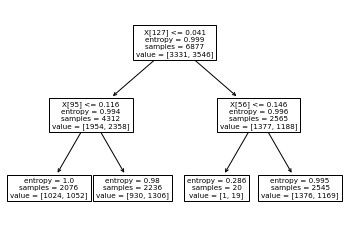